In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import pickle
from pickle import dump
import lmfit
import numpy as np
import scipy.stats as ss
plt.style.use('neuron')
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.formula.api import ols, rlm
import sys
sys.path.append('../')
from Linearity import Neuron
from matplotlib import  rc
#rc('text', usetex=True)

In [2]:
def simpleaxis(axes, every=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

## 4 A Different models schematic (Beta is 1. for DN))

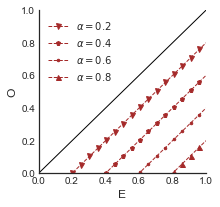

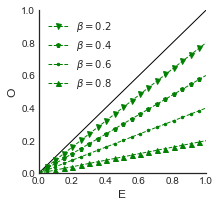

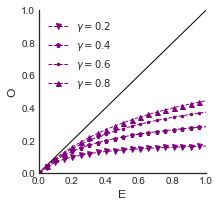

In [4]:
a = np.linspace(0,1,100)

fig,ax = plt.subplots()
ax.plot(a, a)
ax.plot(a, a - 0.2, 'v--', color='brown', label="$\\alpha = 0.2$", markersize=5, markevery=5)
ax.plot(a, a - 0.4, 'p--', color='brown', label="$\\alpha = 0.4$", markersize=5, markevery=5)
ax.plot(a, a - 0.6, '.--', color='brown', label="$\\alpha = 0.6$", markersize=5, markevery=5)
ax.plot(a, a - 0.8, '^--', color='brown', label="$\\alpha = 0.8$", markersize=5, markevery=5)
ax.set_xlabel("E")
ax.set_ylabel("O")
ax.set_ylim((0,1))
ax.set_xlim((0,1))
ax.set_title("Subtractive Inhibition $O = E - \\alpha$")
ax.legend()
simpleaxis(ax)
fig.set_figwidth(3)
fig.set_figheight(3)
dump(fig,file('figures/fig4/4a1.pkl','wb'))
plt.show()

fig,ax = plt.subplots()
ax.plot(a, a)
ax.plot(a, a*0.8, 'v--', color='green', label="$\\beta = 0.2$", markersize=5, markevery=5)
ax.plot(a, a*0.6, 'p--', color='green', label="$\\beta = 0.4$", markersize=5, markevery=5)
ax.plot(a, a*0.4, '.--', color='green', label="$\\beta = 0.6$", markersize=5, markevery=5)
ax.plot(a, a*0.2, '^--', color='green', label="$\\beta = 0.8$", markersize=5, markevery=5)
ax.set_xlabel("E")
ax.set_ylabel("O")
ax.set_ylim((0,1))
ax.set_xlim((0,1))
ax.legend()
ax.set_title("Divisive Inhibition $O = E - \\beta \\times E$")
simpleaxis(ax)
fig.set_figwidth(3)
fig.set_figheight(3)
dump(fig,file('figures/fig4/4a2.pkl','wb'))
plt.show()

fig,ax = plt.subplots()
ax.plot(a, a)
ax.plot(a, (0.2*a)/(0.2 + a), 'v--', color='purple', label="$\\gamma = 0.2$", markersize=5, markevery=5)
ax.plot(a, (0.4*a)/(0.4 + a), 'p--', color='purple', label="$\\gamma = 0.4$", markersize=5, markevery=5)
ax.plot(a, (0.6*a)/(0.6 + a), '.--', color='purple', label="$\\gamma = 0.6$", markersize=5, markevery=5)
ax.plot(a, (0.8*a)/(0.8 + a), '^--', color='purple', label="$\\gamma = 0.8$", markersize=5, markevery=5)
ax.set_xlabel("E")
ax.set_ylabel("O")
ax.set_ylim((0,1))
ax.set_xlim((0,1))
fig.set_figwidth(3)
fig.set_figheight(3)
ax.legend()
ax.set_title("Divisive Normalization $O = E - \\frac{ \\gamma E}{ \\gamma E + 1} \\times E $")
simpleaxis(ax)
dump(fig,file('figures/fig4/4a3.pkl','wb'))
plt.show()

In [5]:
currentClampFiles = '/media/sahil/NCBS_Shares_BGStim/patch_data/normalization_files.txt'
with open (currentClampFiles,'r') as r:
    dirnames = r.read().splitlines()

In [6]:
feature = 0
scalingFactor = 1e9
neurons = {}
for dirname in dirnames:
    cellIndex = dirname.split('/')[-2]
    filename = dirname + 'plots/' + cellIndex + '.pkl'
    n = Neuron.load(filename)
    neurons[str(n.date) + '_' + str(n.index)] = n

In [7]:
#Colorscheme for squares
color_sqr = { index+1: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,9)))}

In [8]:
control_result2_rsquared_adj = []
control_result1_rsquared_adj = []
control_var_expected = []
gabazine_result2_rsquared_adj = []
gabazine_result1_rsquared_adj = []
gabazine_var_expected = []
tolerance = 5e-4

In [9]:
def linearModel(x, beta=100):
    # Linear model
    return (x*(1-beta))

def DN_model(x, beta=100, gamma=100):
    # Divisive normalization model
    #return x - a*(x**2)/(b+x)
    return ((x**2)*(1-beta) + (gamma*x))/(x+gamma)

In [10]:
neurons

{'150828_c2': <Linearity.Neuron instance at 0x7f7810e5fa70>,
 '150902_c1': <Linearity.Neuron instance at 0x7f780f291f80>,
 '150902_c2': <Linearity.Neuron instance at 0x7f781118a560>,
 '150904_c1': <Linearity.Neuron instance at 0x7f78110824d0>,
 '160209_c4': <Linearity.Neuron instance at 0x7f780d350ef0>,
 '160219_c5': <Linearity.Neuron instance at 0x7f780f412ef0>,
 '160223_c2': <Linearity.Neuron instance at 0x7f780eb1ed88>,
 '160223_c3': <Linearity.Neuron instance at 0x7f7829778f38>,
 '160513_c5': <Linearity.Neuron instance at 0x7f781111c128>,
 '160617_c5': <Linearity.Neuron instance at 0x7f780d9e48c0>,
 '160817_c2': <Linearity.Neuron instance at 0x7f78169fc5f0>,
 '160830_c1': <Linearity.Neuron instance at 0x7f780c954878>,
 '160920_c1': <Linearity.Neuron instance at 0x7f780dd421b8>,
 '160927_c1': <Linearity.Neuron instance at 0x7f780f54add0>,
 '160927_c3': <Linearity.Neuron instance at 0x7f780f6c3c68>,
 '160927_c5': <Linearity.Neuron instance at 0x7f780e74a9e0>,
 '160928_c3': <Linearity

## 4 B Divisive Normalization representative cell

In [11]:
feature = 0 # Area under the curve
neuron = neurons['170303_c1']
expected, observed, g_expected, g_observed = {}, {}, {}, {}
for expType, exp in neuron:
    ## Control case
    if(expType == "Control"):
        for sqr in exp:
            if sqr > 1:
                expected[sqr] = []
                observed[sqr] = []
                for coord in exp[sqr].coordwise:
                    for trial in exp[sqr].coordwise[coord].trials:
                        if all([value == 0 for value in trial.flags.values()]):
                            expected[sqr].append(exp[sqr].coordwise[coord].expected_feature[feature])
                            observed[sqr].append(trial.feature[feature])

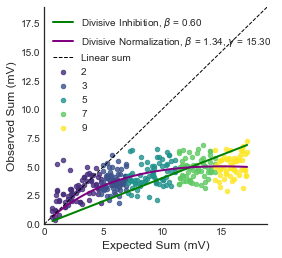

In [12]:
lin_aic = []
dn_aic = []
lin_chi = []
dn_chi = []
max_exp, max_g_exp = 0.,0.
fig, ax = plt.subplots()
squareVal = []
list_control_expected = []
list_control_observed = []

for sqr in sorted(observed):
    squareVal.append(ax.scatter(expected[sqr], observed[sqr], label=str(sqr), c=color_sqr[sqr], alpha=0.8, s=20))
    max_exp = max(max_exp, max(expected[sqr]))
    list_control_expected += expected[sqr]
    list_control_observed += observed[sqr]
    
X = np.array(list_control_expected)
y = np.array(list_control_observed)
idx   = np.argsort(X)
X = X[idx]
y = y[idx]

linear_Model = lmfit.Model(linearModel)
DN_Model = lmfit.Model(DN_model)

lin_pars = linear_Model.make_params()
lin_result = linear_Model.fit(y, lin_pars, x=X)
lin_aic.append(lin_result.aic)
lin_chi.append(lin_result.redchi)

DN_pars = DN_Model.make_params()
DN_result = DN_Model.fit(y, DN_pars, x=X)
dn_aic.append(DN_result.aic)
dn_chi.append(DN_result.redchi)

# print (lin_result.fit_report())
# print (DN_result.fit_report())

ax.set_xlim(xmin=0.)
ax.set_ylim(ymin=0.)
ax.set_xlabel("Expected")
ax.set_ylabel("Observed")
ax.set_title("Divisive Normalization and Inhibition fits")
div_inh = ax.plot(X, lin_result.best_fit, '-', color='green', lw=2)
div_norm = ax.plot(X, DN_result.best_fit, '-', color='purple', lw=2)


max_exp *=1.1
max_g_exp *=1.1
ax.set_xlim(0,max_exp)
ax.set_ylim(0,max_exp)
ax.set_xlabel("Expected Sum (mV)")
ax.set_ylabel("Observed Sum (mV)")
linear = ax.plot((0,max_exp), (0,max_exp), 'k--')

legends = div_inh + div_norm + linear +  squareVal
labels = ["Divisive Inhibition, $\\beta$ = {:.2f}".format(lin_result.params['beta'].value), "Divisive Normalization, $\\beta$ = {:.2f}, $\\gamma$ = {:.2f}".format(DN_result.params['beta'].value, DN_result.params['gamma'].value), "Linear sum"] +  sorted(observed.keys()) 

ax.legend(legends, labels, loc='upper left')

simpleaxis(ax)
fig.set_figwidth(4)
fig.set_figheight(4)
dump(fig,file('figures/fig4/4b.pkl','wb'))
plt.show()

### 2 cells not working check them out.

In [13]:
neurons.pop('150904_c3', None)
neurons.pop('160126_c3', None)

In [14]:
feature = 0 # Area under the curve
lin_bic = []
dn_bic = []
lin_chi = []
dn_chi = []
beta = []
gamma = []
delta = []
zeta, zeta2 = [], []
for index in neurons:
#     print (index)
    neuron = neurons[index]
    expected, observed, g_expected, g_observed = {}, {}, {}, {}
    for expType, exp in neuron:
        ## Control case
        if(expType == "Control"):
            for sqr in exp:
                if sqr > 1:
                    expected[sqr] = []
                    observed[sqr] = []
                    for coord in exp[sqr].coordwise:
                        for trial in exp[sqr].coordwise[coord].trials:
                            if all([value == 0 for value in trial.flags.values()]):
                                expected[sqr].append(exp[sqr].coordwise[coord].expected_feature[feature])
                                observed[sqr].append(trial.feature[feature])

            max_exp, max_g_exp = 0.,0.

            squareVal = []
            list_control_expected = []
            list_control_observed = []

            for sqr in sorted(observed):
                squareVal.append(ax.scatter(expected[sqr], observed[sqr], label=str(sqr), c=color_sqr[sqr], alpha=0.8))
                max_exp = max(max_exp, max(expected[sqr]))
                list_control_expected += expected[sqr]
                list_control_observed += observed[sqr]

            X = np.array(list_control_expected)
            y = np.array(list_control_observed)
            idx   = np.argsort(X)
            X = X[idx]
            y = y[idx]

            linear_Model = lmfit.Model(linearModel)
            DN_Model = lmfit.Model(DN_model)

            lin_pars = linear_Model.make_params()
            lin_result = linear_Model.fit(y, lin_pars, x=X)
            lin_bic.append(lin_result.bic)
            lin_chi.append(lin_result.redchi)
            beta.append(lin_result.params['beta'])

            DN_pars = DN_Model.make_params()
            DN_result = DN_Model.fit(y, DN_pars, x=X)
            dn_bic.append(DN_result.bic)
            dn_chi.append(DN_result.redchi)
            gamma.append(DN_result.params['gamma'])
            delta.append(DN_result.params['beta'])

## 4 C (Chi-squares population)

Ttest_relResult(statistic=4.5840849239958832, pvalue=4.4094069626456125e-05)


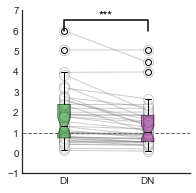

In [56]:
indices = [1,2]
fig, ax = plt.subplots()

for ind, (l,d) in enumerate(zip(lin_chi, dn_chi)):
    ax.plot(indices, [l,d], 'o-', alpha=0.4, color='0.5', markerfacecolor='white')
# ax.violinplot([lin_chi,dn_chi], indices)

# notch shape box plot
bplot = ax.boxplot([lin_chi,dn_chi],
                         notch=True,  # notch shape
#                          vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

colors = ['green', 'purple']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

ax.hlines(1, 0,3, linestyles='--', alpha=0.6)
# ax.boxplot(, [1])

# ax.set_xlim((-1,2))
ax.set_ylim((-1,7))
ax.set_xticks(indices)
ax.set_xticklabels(('DI', 'DN'))
ax.set_title("Reduced chi-square values for DI and DN")
simpleaxis(ax)

print(ss.ttest_rel(lin_chi, dn_chi))

y, h, col = np.max(lin_chi), 0.5, 'k'
plt.plot([1,1, 2, 2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((1+2)*.5, y+h, "***", ha='center', va='bottom', color=col)

fig.set_figwidth(3)
fig.set_figheight(3)
dump(fig,file('figures/fig4/4c.pkl','wb'))
plt.savefig('figures/fig4/4c.svg')
plt.show()

In [57]:
ratio_models = np.array(lin_chi)/np.array(dn_chi)

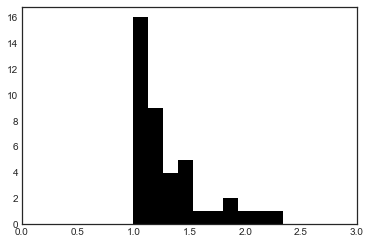

In [58]:
fig, ax = plt.subplots()
ax.hist(ratio_models,bins=10)
ax.set_xlim(0,3)
plt.show()

In [59]:
max(ratio_models)

2.3417287190178255

## 4 D (BIC Population)

Ttest_relResult(statistic=5.5493032812342511, pvalue=2.0303506510400955e-06)


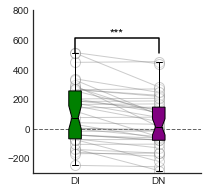

In [60]:
indices = [1,2]
fig, ax = plt.subplots()
for ind, (l,d) in enumerate(zip(lin_bic, dn_bic)):
    ax.plot(indices, [l,d], 'o-', color='0.5', alpha=0.4, markerfacecolor='white')
# ax.violinplot(lin_chi, [0])
# ax.violinplot(dn_chi, [1])
# notch shape box plot
colors = ['green', 'purple']
bplot = ax.boxplot([lin_bic,dn_bic],
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_ylim((-300,800))
ax.hlines(0, 0,3, linestyles='--', alpha=0.6)
ax.set_xticks(indices)
ax.set_xticklabels(('DI', 'DN'))
ax.set_title("BIC values for DI and DN")
# plt.legend()
simpleaxis(ax)
print(ss.ttest_rel(lin_bic, dn_bic))
fig.set_figwidth(3)
fig.set_figheight(3)

y, h, col = np.max(lin_bic), 100, 'k'
plt.plot([1,1, 2, 2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((1+2)*.5, y+h, "***", ha='center', va='bottom', color=col)

dump(fig,file('figures/fig4/4d.pkl','wb'))
plt.savefig('figures/fig4/4d.svg')
plt.show()

In [61]:
ratio_models = (np.array(lin_bic)-np.array(dn_bic))/np.array(dn_bic)

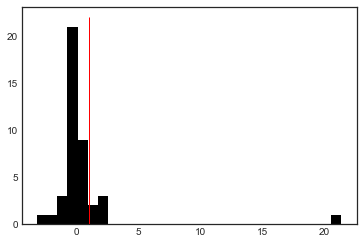

In [62]:
fig, ax = plt.subplots()
ax.hist(ratio_models,bins=30)
ax.vlines(x=1,ymin=0,ymax=22,color='r')
# ax.set_xlim(0,3)
plt.show()

## 4 E (DN Fit parameter gamma)

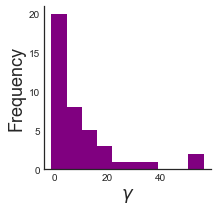

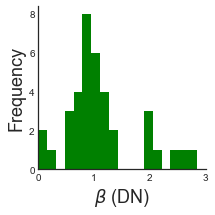

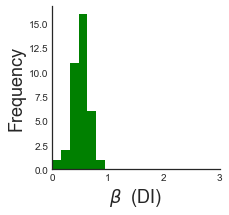

In [17]:
fig, ax = plt.subplots()
# bins = 10
ax.hist(gamma, color='purple')
# ax.set_xlim(-1,2)
ax.set_xlabel("$\\gamma$", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)
ax.set_title("Distribution of fit parameter $\\gamma$", fontsize=18)
simpleaxis(ax)
fig.set_figwidth(3)
fig.set_figheight(3)
dump(fig,file('figures/fig4/4e1.pkl','wb'))
plt.show()

bins = np.linspace(0,3,20)
fig, ax = plt.subplots()
ax.hist(delta, color='green', bins=bins)
ax.set_xlabel("$\\beta$ (DN)", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)
ax.set_title("Distribution of fit parameter $\\beta$", fontsize=18)
simpleaxis(ax)
fig.set_figwidth(3)
fig.set_figheight(3)
ax.set_xlim(0,3)
dump(fig,file('figures/fig4/4e2.pkl','wb'))
plt.show()


bins = np.linspace(0,3,20)
fig, ax = plt.subplots()
ax.hist(beta, color='green', bins=bins)
ax.set_xlabel("$\\beta$  (DI)", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)
ax.set_title("Distribution of fit parameter $\\beta$", fontsize=18)
simpleaxis(ax)
fig.set_figwidth(3)
fig.set_figheight(3)
ax.set_xlim(0,3)
dump(fig,file('figures/fig4/4e3.pkl','wb'))
plt.show()

In [18]:
np.mean(delta), np.std(delta)

(1.0000856225809343, 0.7131880555806458)

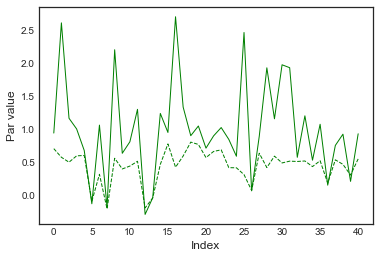

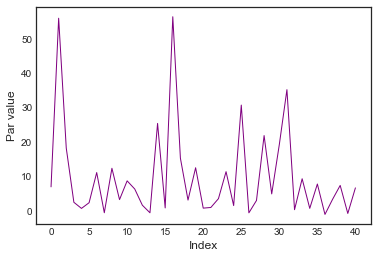

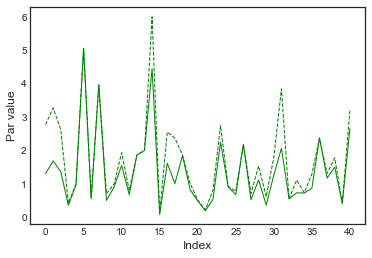

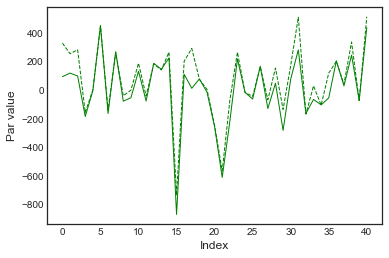

In [19]:
fig, ax = plt.subplots()
# ax.plot(gamma, c='purple')
ax.plot(delta, c='green')
ax.plot(beta, '--', c='green')
ax.set_xlabel("Index")
ax.set_ylabel("Par value")
plt.show()
fig, ax = plt.subplots()
ax.plot(gamma, c='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Par value")
plt.show()

fig, ax = plt.subplots()
# ax.plot(gamma, c='purple')
ax.plot(lin_chi, '--', c='green')
ax.plot(dn_chi,  c='green')
ax.set_xlabel("Index")
ax.set_ylabel("Par value")
plt.show()
fig, ax = plt.subplots()
# ax.plot(gamma, c='purple')
ax.plot(lin_bic, '--', c='green')
ax.plot(dn_bic,  c='green')
ax.set_xlabel("Index")
ax.set_ylabel("Par value")
plt.show()

In [70]:
## Not using

In [ ]:
# fig, ax = plt.subplots()
# bins = 15
# ax.hist(beta, bins=bins, label="$\\beta$")
# plt.legend()
# fig.set_figheight(8)
# fig.set_figwidth(8)
# plt.show()

In [ ]:
# lin_aic = []
# dn_aic = []
# lin_chi = []
# dn_chi = []

# control_observed = {}
# control_observed_average = {}
# gabazine_observed ={}
# gabazine_observed_average = {}
# control_expected = {}
# control_expected_average = {}
# gabazine_expected ={}
# gabazine_expected_average = {}
# feature = 0

# neuron = Neuron.load(filename)
# for expt in neuron.experiment:
#     print ("Starting expt {}".format(expt))
#     for numSquares in neuron.experiment[expt].keys(): 
#         print ("Square {}".format(numSquares))
#         if not numSquares == 1:
#             nSquareData = neuron.experiment[expt][numSquares]
#             if expt == "Control":
#                 coords_C = nSquareData.coordwise
#                 for coord in coords_C: 
#                     if feature in coords_C[coord].feature:
#                         control_observed_average.update({coord: coords_C[coord].average_feature[feature]})
#                         control_expected_average.update({coord: coords_C[coord].expected_feature[feature]})
#                         control_observed.update({coord: []})
#                         control_expected.update({coord: []})
#                         for trial in coords_C[coord].trials:
#                             if feature in trial.feature:
#                                 control_observed[coord].append(trial.feature[feature])
#                                 control_expected[coord].append(coords_C[coord].expected_feature[feature])
#             elif expt == "GABAzine":
#                 coords_I = nSquareData.coordwise
#                 for coord in coords_I: 
#                     if feature in coords_I[coord].feature:
#                         gabazine_observed.update({coord: []})
#                         gabazine_expected.update({coord: []})
#                         gabazine_observed_average.update({coord: coords_I[coord].average_feature[feature]})
#                         gabazine_expected_average.update({coord: coords_I[coord].expected_feature[feature]})

#                         for trial in coords_I[coord].trials:
#                             if feature in trial.feature:
#                                 gabazine_observed[coord].append(trial.feature[feature])
#                                 gabazine_expected[coord].append(coords_I[coord].expected_feature[feature])
# print ("Read {} into variables".format(filename))